In [6]:
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
import os
import plotutils
import datetime
from boto3.session import Session
from botocore.client import Config

In [7]:
%matplotlib inline

In [8]:
def yield_source(source):
    job_results = None
    if source == 'GCS':
        session = Session(
            aws_access_key_id=os.environ['GCS_ACCESS'],
            aws_secret_access_key=os.environ['GCS_SECRET']
        )
        s3 = session.resource('s3', endpoint_url='https://storage.googleapis.com',
                              config=Config(signature_version='s3v4'))

        bucket = s3.Bucket('higgs-demo')
        for x in bucket.objects.filter(Prefix='testoutputs').all():
            yield x
    elif source == 'DSK':
        filelist = glob.glob('./eventselection2/*/*.json')
        indices = np.arange(len(filelist))
        np.random.shuffle(indices)
        for x in [filelist[idx] for idx in indices]:
            yield x
            
def load_source(x,source):
    if source == 'GCS':
        return json.load(x.get()['Body'])
    elif source == 'DSK':
        return json.load(open(x))

(0, 22)

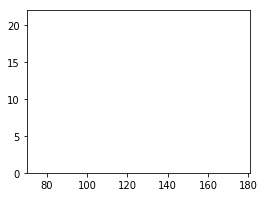

In [9]:
f,ax = plt.subplots(1)
f.set_size_inches(4,3)
ax.set_xlim(70,181)
ax.set_ylim(0,22)

In [10]:
plotutils.reset_plotdata()
for i,x in enumerate(yield_source('DSK')):
    try:
        d = load_source(x,'DSK')
        plotutils.update(d)
        if i % 100 == 0:
            ax.clear()
            weighted_and_summed = plotutils.weight_samples(plotutils.lumi_data,plotutils.samples)
            groups = plotutils.group_samples(weighted_and_summed)
            plotutils.plot(ax,groups)
            f.canvas.draw()
            f.savefig('higgs{}.png'.format(str(i).zfill(7)))
        if 'lumi' in d:
            pass
    except:
        raise

AttributeError: module 'plotutils' has no attribute 'reset_plotdata'